### Exploratory Data Analysis - Retail

Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'

In [2]:
# importing all the necessity libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


LOADING THE DATASET

In [3]:
data = pd.read_csv('SampleSuperstore.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
data.describe()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
data.shape

(9994, 13)

In [13]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

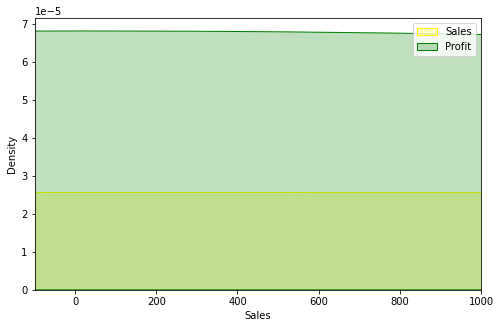

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Sales'], color='yellow', label='Sales', shade=True,bw=25)
sns.kdeplot(data['Profit'], color='green', label='Profit', shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Profit is more than the sale but profit could be increased within some areas

### Analysis using Pairplot of each column

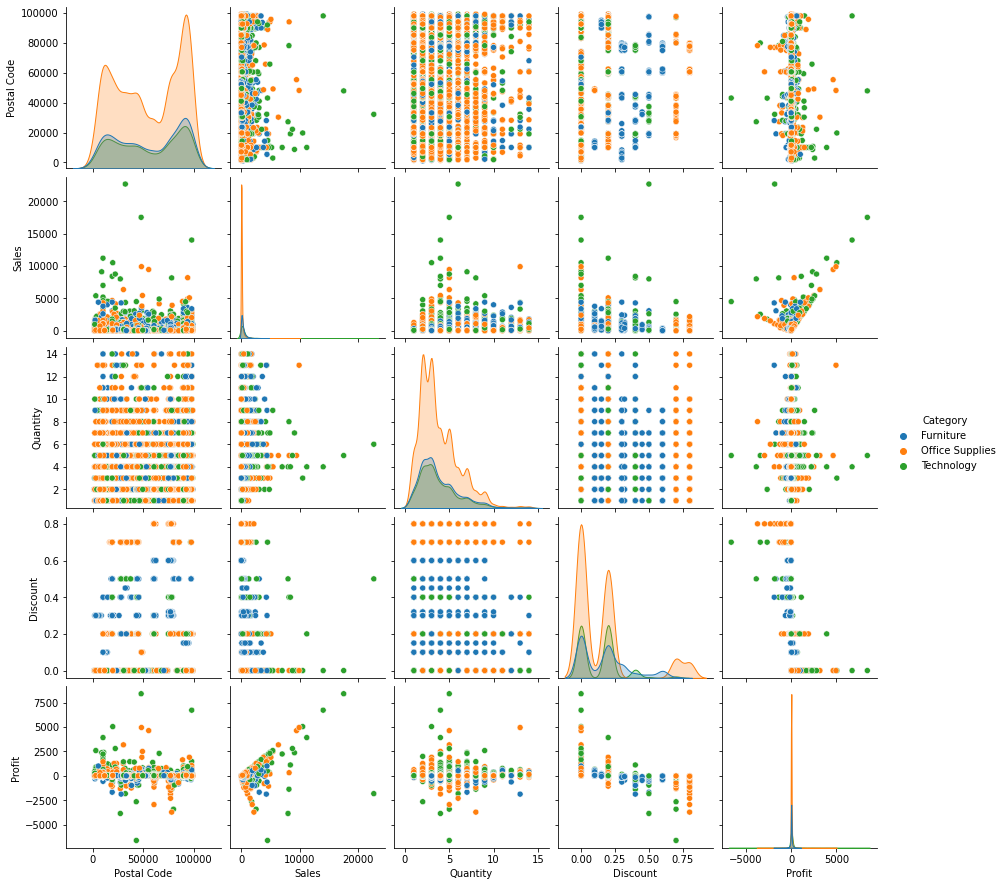

In [15]:
sns.pairplot(data,hue='Category') # based on category

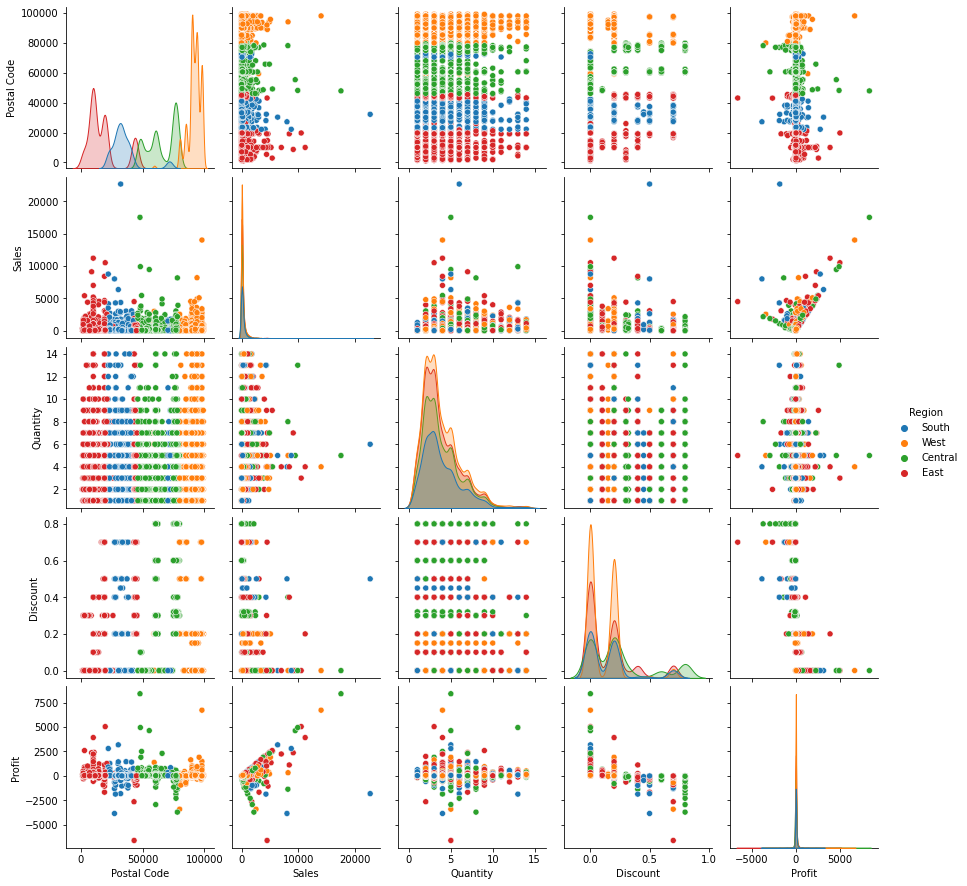

In [17]:
sns.pairplot(data,hue='Region') # based on region

In [18]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


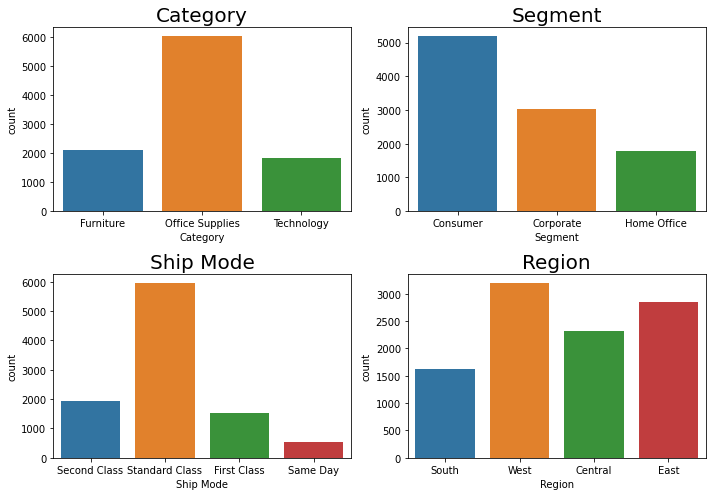

In [19]:
# Count plot for each column

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(data['Category'],ax=axs[0][0])
sns.countplot(data['Segment'],ax=axs[0][1])
sns.countplot(data['Ship Mode'],ax=axs[1][0])
sns.countplot(data['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

Text(0.5, 1.0, 'Sub Category')

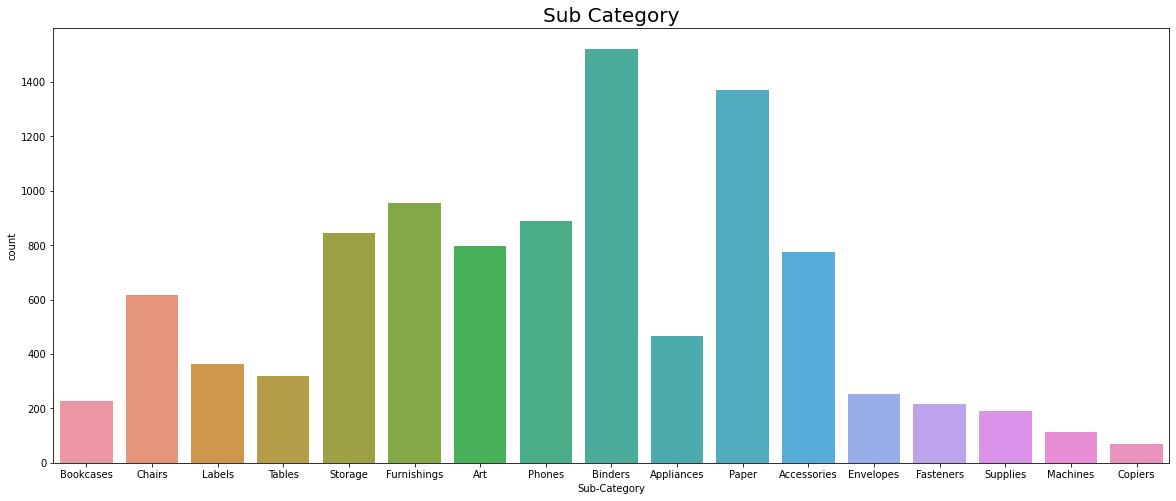

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(data['Sub-Category'])
plt.title('Sub Category',fontsize=20)

Text(0.5, 1.0, 'Quantity')

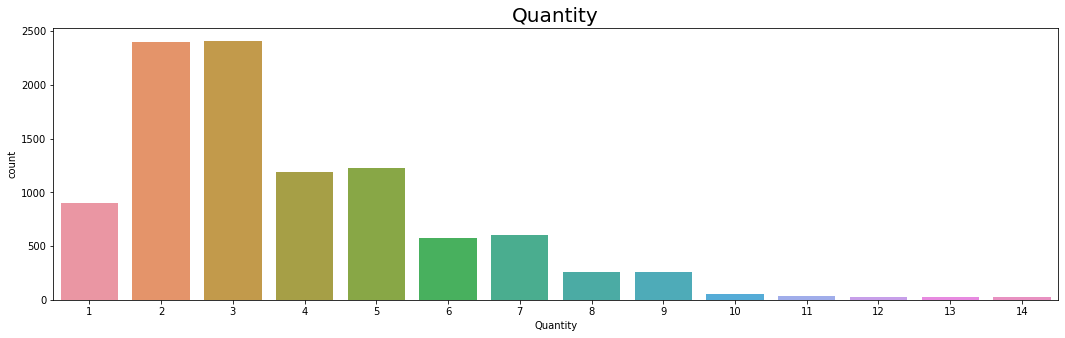

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(data['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

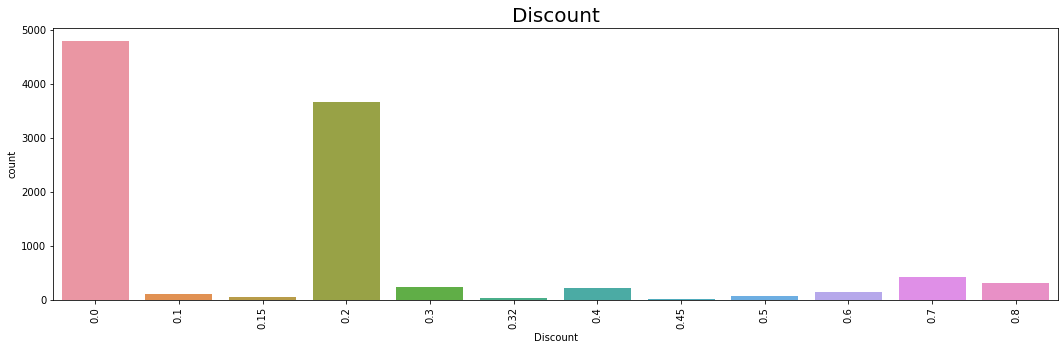

In [23]:
plt.figure(figsize=(18,5))
sns.countplot(data['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

#### Distribution of data 

Text(0.5, 1.0, 'Discount Distribution')

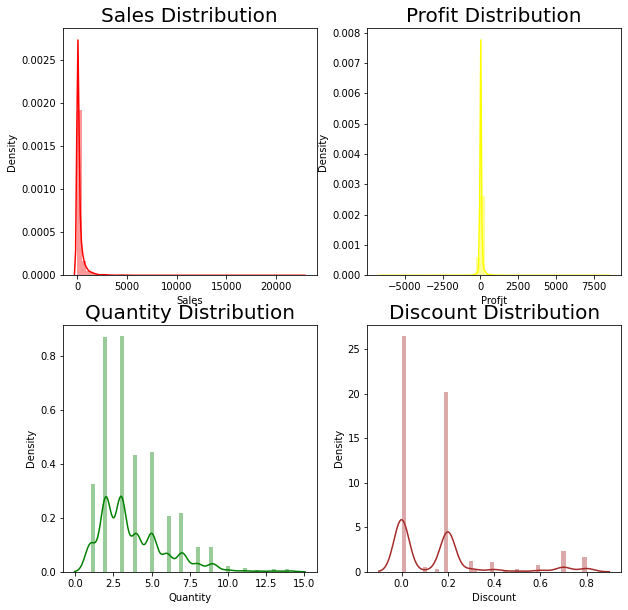

In [25]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))

sns.distplot(data['Sales'],color='red',ax=axs[0][0])
sns.distplot(data['Profit'],color='yellow',ax=axs[0][1])
sns.distplot(data['Quantity'],color='green',ax=axs[1][0])
sns.distplot(data['Discount'],color='brown',ax=axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)


### Statewise Deal Analysis

In [26]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [27]:
data1=data['State'].value_counts()
data1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

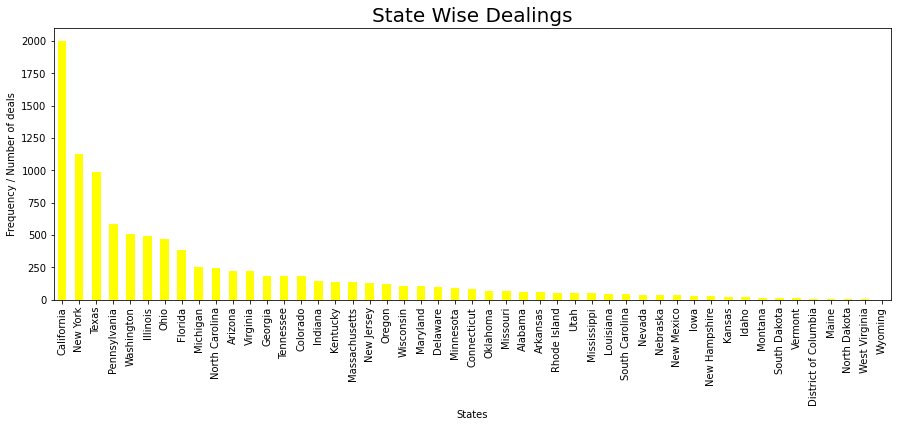

In [39]:
data1.plot(kind='bar',color='yellow',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings',fontsize=20)
plt.show()

Top 3 are : California , New York and Texas

### Citywise analysis of the dealing

In [33]:
data2=data['City'].value_counts()
data2=data2.head(25)
data2

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Name: City, dtype: int64

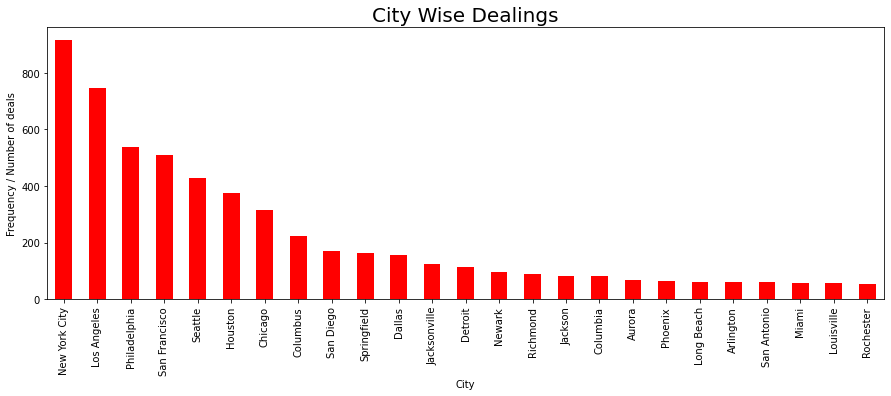

In [38]:
data2.plot(kind='bar',color='red',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize=20)
plt.show()

Top 3 : New York, Los Angeles and philadephia

In [40]:
data['City'].value_counts().mean()#avg no.of deal per city is 19

18.821092278719398

### Segment wise anlaysis of Profit,Discount and sell

In [41]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [42]:
data_segment=data.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
data_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, Profit')

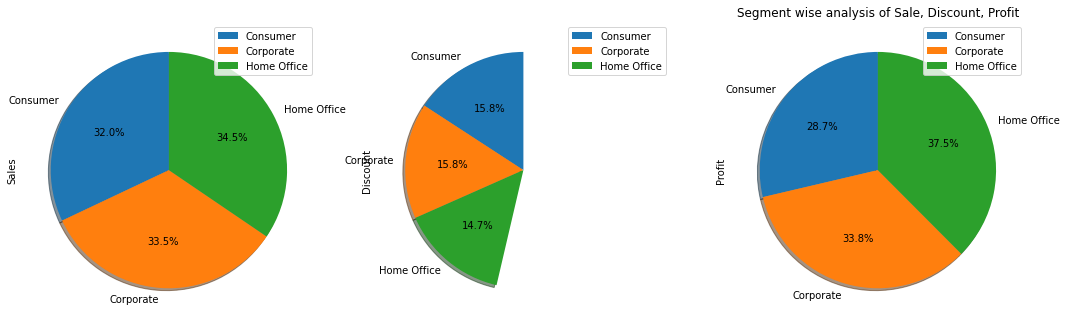

In [47]:
#1.sales 2.Discount 3.Profit
data_segment.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                    figsize=(18,20),
                    startangle=90,
                    shadow=True,
                    labels=data_segment.index)
plt.title('Segment wise analysis of Sale, Discount, Profit')

Sales:                                              
* Consumer:32%                                       
* Corporate : 33.5%                                  
* Home Office : 34.5%

 Discount :
* Consumer : 15.8%
* Corporate : 15.8%
* Home Office : 14.7%

Profit :
* Consumer : 28.7 %
* Corporate : 33.8%
* Home Office : 37.5%

#### Statewise analysis of Profit Discount and Sell

In [48]:
data['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [49]:
data_state=data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


#### Statewise Profit analysis

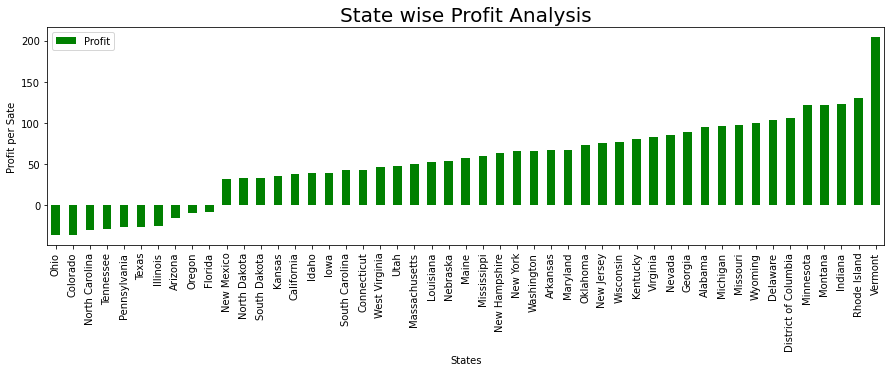

In [51]:
data_state1=data_state.sort_values('Profit')

data_state1[['Profit']].plot(kind='bar',color='green',figsize=(15,4))
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.title('State wise Profit Analysis',fontsize=20)
plt.show()


RESULT:

* Vermont : Highest Profit
* Ohio : Lowest Profit

#### Statewise Sale analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

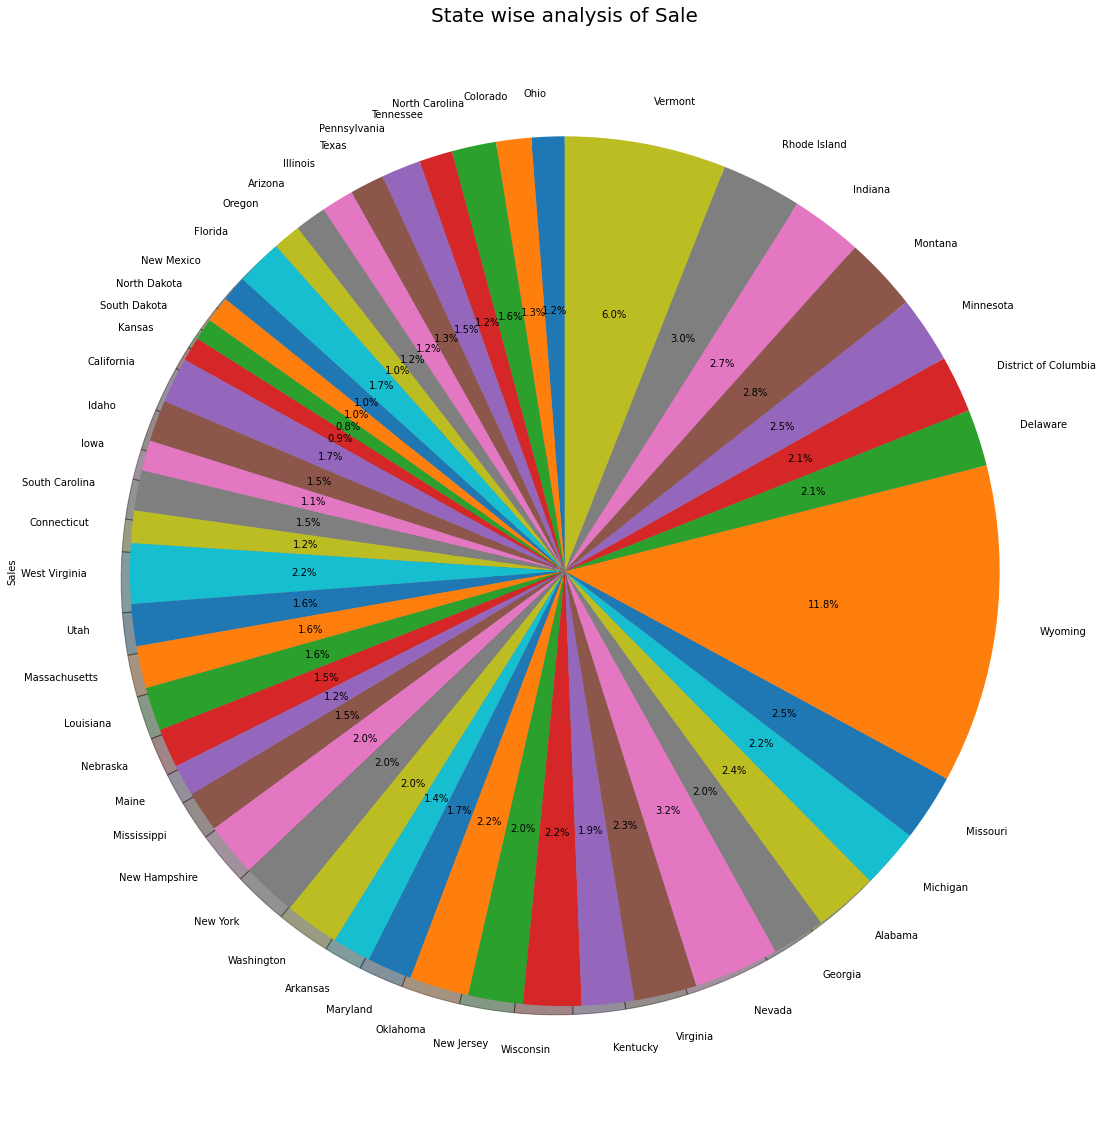

In [52]:
data_state1['Sales'].plot(kind='pie',
                       figsize=(20,20),
                       autopct='%1.1f%%',
                       startangle=90,
                       shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

RESULT
* Highest Amount of sales : Wyoming(11.8%)
* Lowest amount of sales : South Dakota(0.8%)

#### Statewise Discount analysis

Text(0.5, 1.0, 'State wise analysis of Discount')

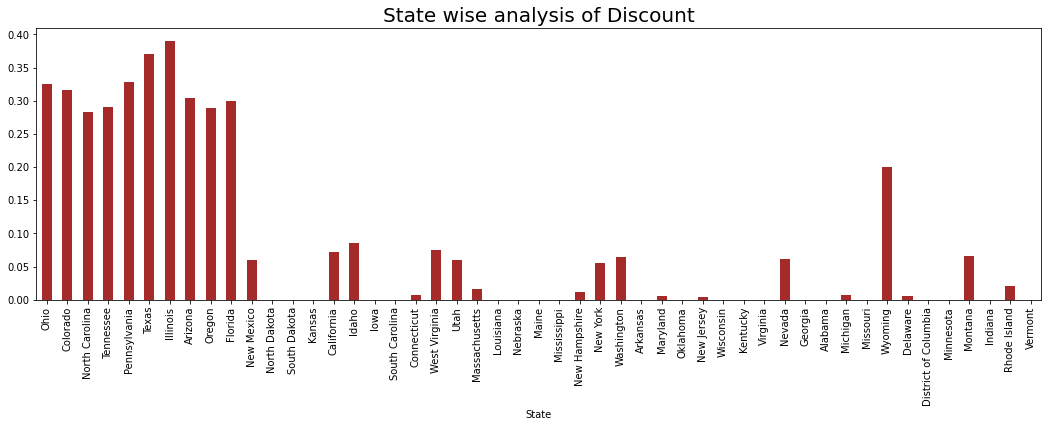

In [54]:
data_state1['Discount'].plot(kind='bar',color='brown',figsize=(18,5))
plt.title('State wise analysis of Discount',fontsize=20)

#### Citywise Analysis of Profit

In [55]:
data_city=data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
data_city=data_city.sort_values('Profit')
data_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


In [56]:
data_city.tail()

,Sales,Discount,Profit
City,,,
Appleton,835.655000,0.0,277.383150
Minneapolis,733.501739,0.0,296.721070
Lafayette,807.619355,0.0,323.173794
Independence,1208.685000,0.0,487.831500
Jamestown,2354.395000,0.0,642.885750


#### Ship Mode Wise analysis

In [57]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [58]:
data_shipmode=data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

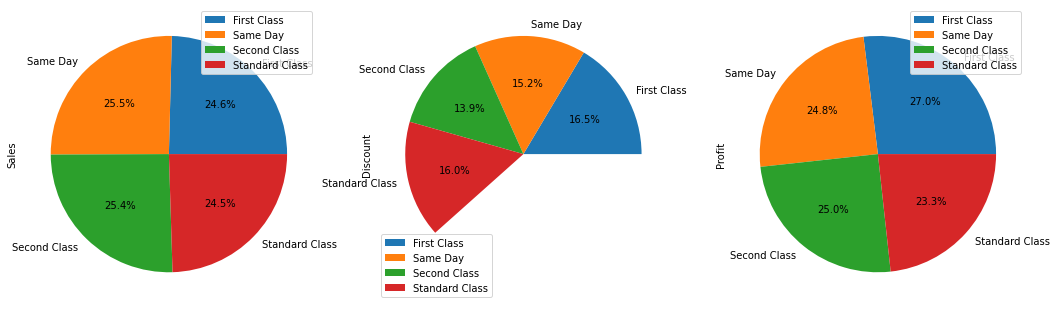

In [63]:
data_shipmode.plot.pie(subplots=True,
                     figsize=(18,20),
                     autopct='%1.1f%%',
                     labels=data_shipmode.index)

Profit and Discount is high in Frist Class

Sales is high for same day ship